In [1]:
 !pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d seroshkarim/cotton-leaf-disease-dataset


Dataset URL: https://www.kaggle.com/datasets/seroshkarim/cotton-leaf-disease-dataset
License(s): unknown


In [ ]:
!unzip /content/cotton-leaf-disease-dataset.zip -d ./COTTON



Archive:  /content/cotton-leaf-disease-dataset.zip
  inflating: ./COTTON/cotton/bacterial_blight/2015-angular-leaf-spot-colquitt-county-2.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/5586201.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/P1010086jpg - Copy.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/P1010086jpg.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact0.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact1.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact10.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact100.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact101.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact102.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact103.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact104.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact105.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact106.jpg  
  inflating: ./COTTON/cotton/bacterial_blight/bact107.jpg  
  infl

In [ ]:
!pip install tensorflow
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the original dataset
dataset_dir = '/content/COTTON'
output_dir = 'cotton_split_dataset'
train_ratio = 0.8  # 80% training, 20% testing

import os
print(os.listdir(dataset_dir))  # Print contents of dataset directory
print("Dataset split completed.")

['cotton']
Dataset split completed.


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Correct path to the image class folders
dataset_dir = '/content/COTTON/cotton'
output_dir = '/content/cotton_split_dataset'
train_ratio = 0.8  # 80% training, 20% testing

# Step 1: List class names
classes = os.listdir(dataset_dir)
print("Classes found:", classes)

# Step 2: Create train/test folders
for split in ['train', 'test']:
    for class_name in classes:
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

# Step 3: Split and copy
for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not images:
        print(f" No images found in class '{class_name}' — skipping.")
        continue

    train_imgs, test_imgs = train_test_split(images, train_size=train_ratio, random_state=42)

    for img in train_imgs:
        shutil.copy2(os.path.join(class_path, img), os.path.join(output_dir, 'train', class_name, img))

    for img in test_imgs:
        shutil.copy2(os.path.join(class_path, img), os.path.join(output_dir, 'test', class_name, img))

print("Dataset successfully split into train/test.")


Classes found: ['curl_virus', 'healthy', 'fussarium_wilt', 'bacterial_blight']
Dataset successfully split into train/test.


In [ ]:
#Resize all images
image_size=[224,224]


In [ ]:
train_path = '/content/cotton_split_dataset/train'

valid_path='/content/cotton_split_dataset/test'

In [ ]:
#import vgg16 library and add preprocessing layers to the front
vgg=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#dont train existing weights
for layers in vgg.layers:
  layers.trainable=False

In [ ]:
#useful for getting no.of layers
folders=glob('/content/cotton_split_dataset/train/*')
folders

['/content/cotton_split_dataset/train/curl_virus',
 '/content/cotton_split_dataset/train/healthy',
 '/content/cotton_split_dataset/train/fussarium_wilt',
 '/content/cotton_split_dataset/train/bacterial_blight']

In [ ]:
#flatten our layer
x=Flatten()(vgg.output)
len(folders)

4

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
#create a model object
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
#view structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
training_set=train_datagen.flow_from_directory('/content/cotton_split_dataset/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 1366 images belonging to 4 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/cotton_split_dataset/test',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 343 images belonging to 4 classes.


In [ ]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),  # Changed 'step_per_epoch' to 'steps_per_epoch'
    validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 55s 939ms/step - accuracy: 0.5331 - loss: 1.4459 - val_accuracy: 0.8630 - val_loss: 0.3604
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 51s 504ms/step - accuracy: 0.9057 - loss: 0.2944 - val_accuracy: 0.9096 - val_loss: 0.2415
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 515ms/step - accuracy: 0.9438 - loss: 0.1769 - val_accuracy: 0.9242 - val_loss: 0.2161
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 523ms/step - accuracy: 0.9786 - loss: 0.1021 - val_accuracy: 0.9417 - val_loss: 0.1689
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 521ms/step - accuracy: 0.9855 - loss: 0.0799 - val_accuracy: 0.9388 - val_loss: 0.1323


Found 343 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


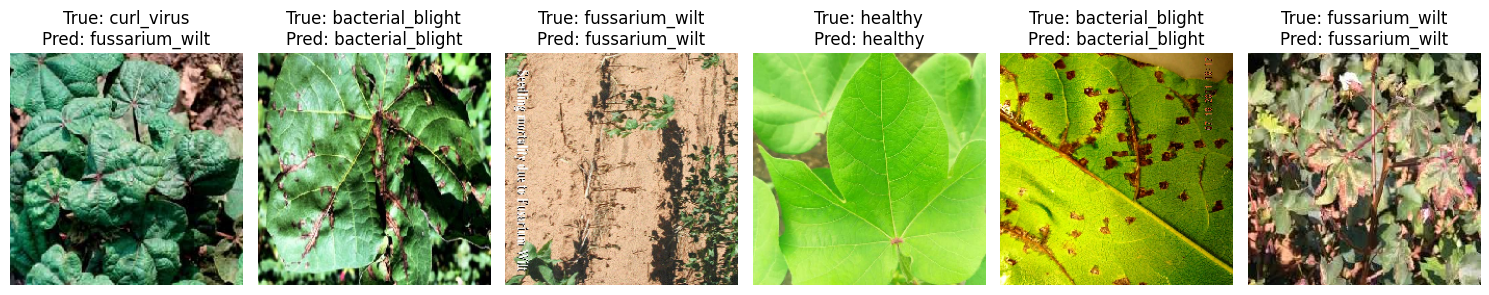

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you already have the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'cotton_split_dataset/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=True
)

# Class indices (dictionary)
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Predict and plot images
def visualize_predictions(model, generator, class_labels, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        # Use __next__() instead of next()
        img, label = generator.__next__()
        prediction = model.predict(img)
        pred_label = class_labels[np.argmax(prediction)]
        true_label = class_labels[np.argmax(label)]

        plt.subplot(1, num_images, i+1)
        plt.imshow(img[0])
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
visualize_predictions(model, test_generator, class_labels, num_images=6)

**VGG19**

In [ ]:
from tensorflow.keras.applications import VGG19

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg19 = VGG19(input_shape=image_size+[3], weights='imagenet', include_top=False)


In [ ]:
#dont train existing weights
for layers in vgg19.layers:
  layers.trainable=False

In [ ]:
#useful for getting no.of layers
folders=glob('/content/cotton_split_dataset/train/*')
folders

['/content/cotton_split_dataset/train/curl_virus',
 '/content/cotton_split_dataset/train/healthy',
 '/content/cotton_split_dataset/train/fussarium_wilt',
 '/content/cotton_split_dataset/train/bacterial_blight']

In [ ]:
#flatten our layer
x=Flatten()(vgg19.output)
len(folders)

4

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
#create a model object
model=Model(inputs=vgg19.input,outputs=prediction)

In [ ]:

#view structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,124,740 (76.77 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
training_set=train_datagen.flow_from_directory('/content/cotton_split_dataset/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 1366 images belonging to 4 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/cotton_split_dataset/test',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 343 images belonging to 4 classes.


In [ ]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),  # Changed 'step_per_epoch' to 'steps_per_epoch'
    validation_steps=len(test_set)
)

Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 28s 594ms/step - accuracy: 0.5125 - loss: 1.4438 - val_accuracy: 0.8601 - val_loss: 0.4428
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 37s 529ms/step - accuracy: 0.8695 - loss: 0.3588 - val_accuracy: 0.8222 - val_loss: 0.4912
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 42s 546ms/step - accuracy: 0.9368 - loss: 0.2307 - val_accuracy: 0.8805 - val_loss: 0.3504
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 549ms/step - accuracy: 0.9589 - loss: 0.1476 - val_accuracy: 0.9009 - val_loss: 0.2649
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 531ms/step - accuracy: 0.9640 - loss: 0.1403 - val_accuracy: 0.9184 - val_loss: 0.2048


Found 343 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


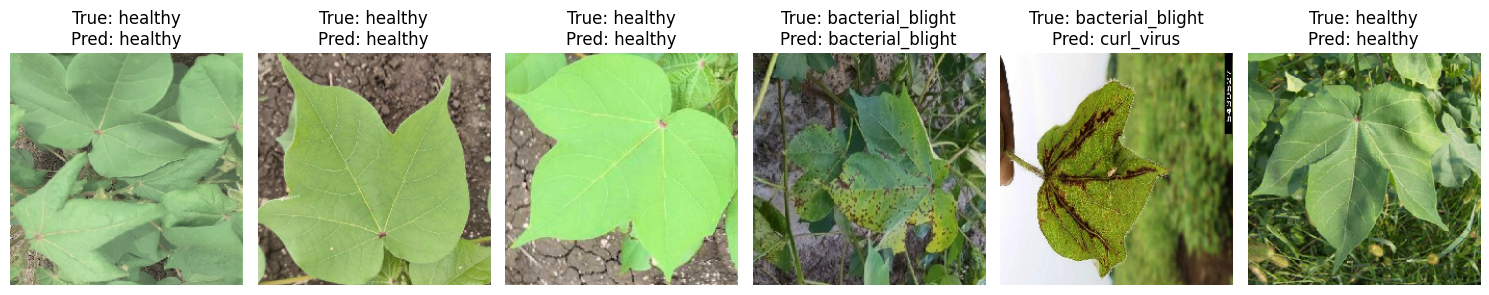

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you already have the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'cotton_split_dataset/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=True
)

# Class indices (dictionary)
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Predict and plot images
def visualize_predictions(model, generator, class_labels, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        # Use __next__() instead of next()
        img, label = generator.__next__()
        prediction = model.predict(img)
        pred_label = class_labels[np.argmax(prediction)]
        true_label = class_labels[np.argmax(label)]

        plt.subplot(1, num_images, i+1)
        plt.imshow(img[0])
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
visualize_predictions(model, test_generator, class_labels, num_images=6)

***ResNet***


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#dont tforrain existing weights
for layers in base_model.layers: # Iterate through layers of the instantiated base_model
  layers.trainable=False

  #useful for getting no.of layers
folders=glob('/content/cotton_split_dataset/train/*')
folders
#flatten our layer
x=Flatten()(base_model.output)
len(folders)
prediction=Dense(len(folders),activation='softmax')(x)

#create a model object
model=Model(inputs=base_model.input,outputs=prediction)


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory('/content/cotton_split_dataset/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set=test_datagen.flow_from_directory('/content/cotton_split_dataset/test',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 1366 images belonging to 4 classes.
Found 343 images belonging to 4 classes.
Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 48s 769ms/step - accuracy: 0.3311 - loss: 5.4615 - val_accuracy: 0.4082 - val_loss: 1.9673
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 480ms/step - accuracy: 0.4237 - loss: 1.8482 - val_accuracy: 0.5190 - val_loss: 1.2242
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 488ms/step - accuracy: 0.4940 - loss: 1.2473 - val_accuracy: 0.4810 - val_loss: 1.3740
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 469ms/step - accuracy: 0.4656 - loss: 1.4325 - val_accuracy: 0.5481 - val_loss: 1.1674
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 526ms/step - accuracy: 0.5381 - loss: 1.1725 - val_accuracy: 0.5364 - val_loss: 1.1855
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 38s 458ms/step - accuracy: 0.5374 - loss: 1.1728 - val_accuracy: 0.5685 - val_loss: 1.0662
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 475ms/step - accuracy: 0.6165 - loss: 1.0046 - val

Found 343 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


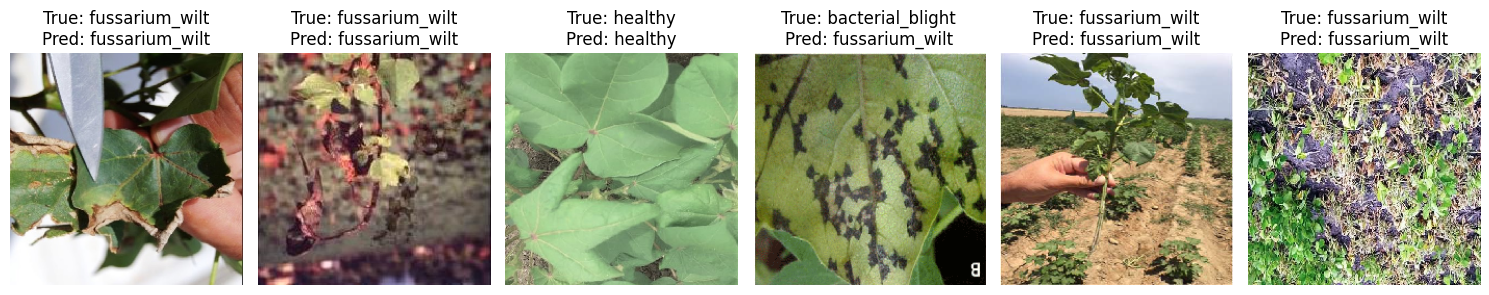

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you already have the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'cotton_split_dataset/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=True
)

# Class indices (dictionary)
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Predict and plot images
def visualize_predictions(model, generator, class_labels, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        # Use __next__() instead of next()
        img, label = generator.__next__()
        prediction = model.predict(img)
        pred_label = class_labels[np.argmax(prediction)]
        true_label = class_labels[np.argmax(label)]

        plt.subplot(1, num_images, i+1)
        plt.imshow(img[0])
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
visualize_predictions(model, test_generator, class_labels, num_images=6)